In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set()

**Data**

In [3]:
data = pd.read_csv("3.12. Example.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Text(0, 0.5, 'Loyalty')

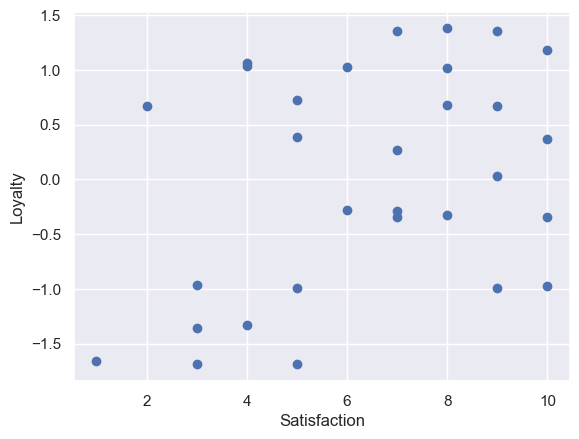

In [4]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**Features**

In [5]:
x = data.copy()

**Clustering**

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [8]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Loyalty')

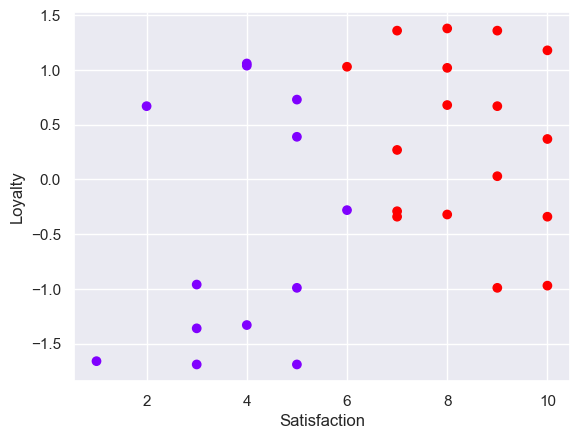

In [9]:
plt.scatter(clusters["Satisfaction"], clusters["Loyalty"], c=clusters["cluster_pred"], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**Estandarizar las variables**

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

**Método del Codo**

In [11]:
wcss = list()
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

[60.0,
 29.818973034723147,
 17.913349527387968,
 10.24718180592842,
 7.792695153937188,
 6.569489487091783,
 5.326631124753925,
 4.434309636536097,
 3.7985760495367207]

Text(0, 0.5, 'WCSS')

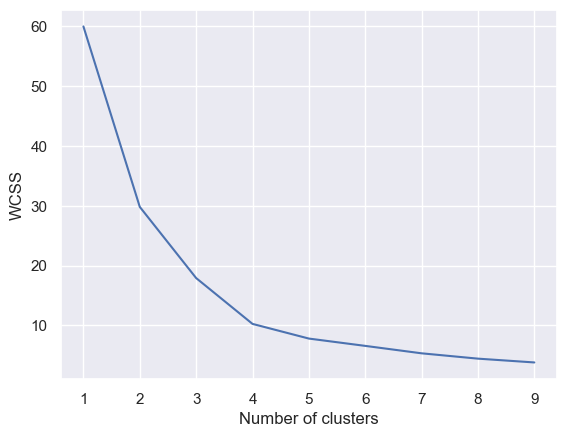

In [12]:
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**Clustering solutions**

In [23]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new["cluster_pred"] = kmeans_new.fit_predict(x_scaled)
clusters_new.head()

c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,0


Text(0, 0.5, 'Loyalty')

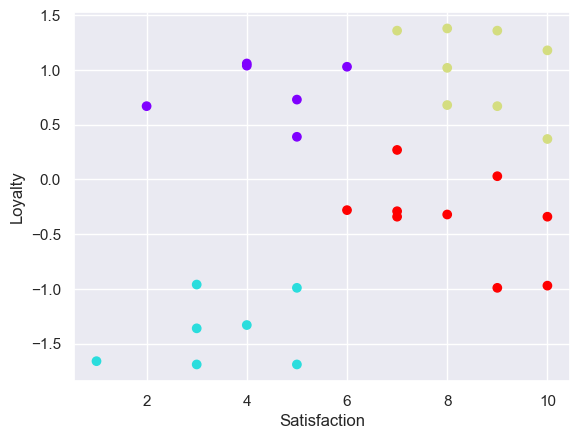

In [24]:
plt.scatter(clusters_new["Satisfaction"], clusters_new["Loyalty"], c=clusters_new["cluster_pred"], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')